# A Simple Trend Following System and Strategy in the S&P 500: Insights from Meb Faber and Paul Tudor Jones

1. Go long the S&P 500 when the price crosses the 200-day moving average
2. Sell when it crosses below the 200-day average.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Importing the dataset
data = pd.read_csv('./Candle_data/^NSEI-MAX.csv', index_col=0, parse_dates=True)
data = data.dropna()
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

print(data.head())
print('#' * 30)
print(data.tail())
print('#' * 30)
print(data.info())

                   Open         High          Low        Close  Volume
Date                                                                  
2007-09-17  4518.450195  4549.049805  4482.850098  4494.649902     0.0
2007-09-18  4494.100098  4551.799805  4481.549805  4546.200195     0.0
2007-09-19  4550.250000  4739.000000  4550.250000  4732.350098     0.0
2007-09-20  4734.850098  4760.850098  4721.149902  4747.549805     0.0
2007-09-21  4752.950195  4855.700195  4733.700195  4837.549805     0.0
##############################
                    Open          High           Low         Close    Volume
Date                                                                        
2023-12-04  20601.949219  20702.650391  20507.750000  20686.800781  381100.0
2023-12-05  20808.900391  20864.050781  20711.150391  20855.099609  421000.0
2023-12-06  20950.750000  20961.949219  20852.150391  20937.699219  359200.0
2023-12-07  20932.400391  20941.250000  20850.800781  20901.150391  275000.0
2023-12-08

<AxesSubplot:xlabel='Date'>

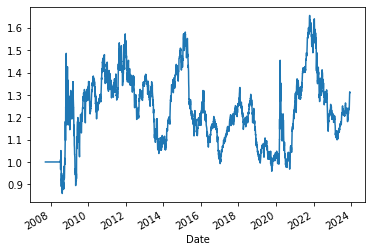

In [11]:
# Trading rule,
# 1. Buy when the price crosses the 200-day moving average
# 2. Sell when it crosses below the 200-day average.

# 1. Compute the 200-day moving average for the time series
data['MA200'] = data['Close'].rolling(window=200).mean()

# Loop over the time series and compute the signals
data['position'] = 0 # Create a column for the position (1 for long, -1 for short, 0 for flat)
for index, row in data.iterrows():
    if row['Close'] > row['MA200']: # Buy
        data.loc[index, 'position'] = 1
    elif row['Close'] < row['MA200']: # Sell the position
        data.loc[index, 'position'] = -1

data['daily_returns'] = data['Close'].pct_change()
data['strategy_returns'] = data['position'].shift(1) * data['daily_returns']
data['cumulative_returns'] = (data['strategy_returns'] + 1).cumprod()

# Plot the strategy returns
data['cumulative_returns'].plot()


<AxesSubplot:xlabel='Date'>

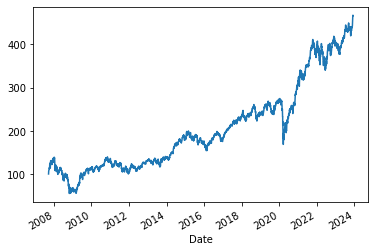

In [14]:
# Calculate the portflolio equity curve if we had invested $100 in the index
data['index_returns'] = data['Close'].pct_change()
data['index_cumulative_returns'] = (data['index_returns'] + 1).cumprod()
data['index_equity'] = 100 * data['index_cumulative_returns']

# Plot the index equity curve
data['index_equity'].plot()


The maximum drawdown is -39.79%


<AxesSubplot:xlabel='Date'>

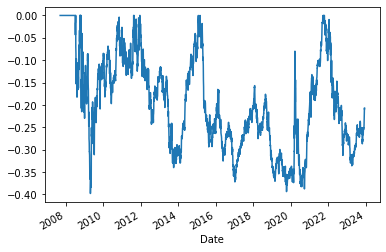

In [15]:
# Calculate the drawdowns
data['Peak'] = data['cumulative_returns'].cummax()
data['Drawdown'] = data['cumulative_returns'] - data['Peak']
data['Drawdown_pct'] = data['Drawdown'] / data['Peak']

# Calculate the maximum drawdown
max_dd = data['Drawdown_pct'].min()
print("The maximum drawdown is {:.2%}".format(max_dd))

# Plot the drawdowns
data['Drawdown_pct'].plot()


In [21]:
# Calculate the annualized return
annualized_return = data['strategy_returns'].mean() * 252
print("The annualized return is {:.2%}".format(annualized_return))

# Calculate the annualized volatility
annualized_volatility = data['strategy_returns'].std() * np.sqrt(252)
# print("The annualized volatility is {:.2%}".format(annualized_volatility))

# Calculate the Sharpe ratio
sharpe_ratio = annualized_return / annualized_volatility
print("The Sharpe ratio is {:.2}".format(sharpe_ratio))

# Calculate the buy and hold strategy returns
buy_and_hold_strategy = data['index_returns'].sum()
print("The buy and hold strategy return is {:.2%}".format(buy_and_hold_strategy))

# Calculate the buy and hold strategy volatility
buy_and_hold_volatility = data['index_returns'].std() * np.sqrt(252)
# print("The buy and hold strategy volatility is {:.2%}".format(buy_and_hold_volatility))

# Calculate the buy and hold Sharpe ratio
buy_and_hold_sharpe_ratio = buy_and_hold_strategy / buy_and_hold_volatility
print("The buy and hold Sharpe ratio is {:.2}".format(buy_and_hold_sharpe_ratio))

# Calculate the maximum drawdown on the index
index_dd = data['Drawdown_pct'].min()
print("The maximum drawdown on the index is {:.2%}".format(index_dd))

# Calculate the Sharpe ratio of the index
index_sharpe_ratio = data['index_returns'].mean() / data['index_returns'].std() * np.sqrt(252)
print("The Sharpe ratio of the index is {:.2}".format(index_sharpe_ratio))

The annualized return is 3.70%
The Sharpe ratio is 0.19
The buy and hold strategy return is 190.56%
The buy and hold Sharpe ratio is 8.9
The maximum drawdown on the index is -39.79%
The Sharpe ratio of the index is 0.56
